# Case study on probability

Problem Statement:
    
    To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset

Attribute Information:
    
• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y

• bruises: bruises=t, no=f
    
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s

• gill-attachment: attached=a, descending=d, free=f, notched=n
    
• gill-spacing: close=c, crowded=w, distant=d
    
• gill-size: broad=b, narrow=n
    
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,
pink=p, purple=u, red=e, white=w, yellow=y

• stalk-shape: enlarging=e, tapering=t
    
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r,
missing=?

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y

• veil-type: partial=p, universal=u
    
• veil-colour: brown=n, orange=o, white=w, yellow=y
    
• ring-number: none=n, one=o, two=t
    
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading data
data= pd.read_csv('C:/Users/nitha lamia/Downloads/mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.shape

(8124, 23)

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
#Checking for null values.
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no missing values in mushroom dataset.

<AxesSubplot:xlabel='class'>

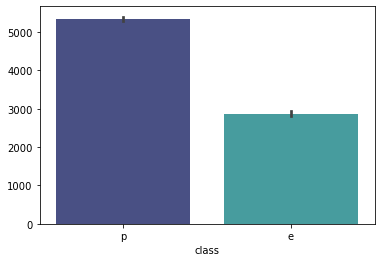

In [8]:
#Barplot of edible and poisonous mushroom.

sns.barplot(x="class",y=data["class"].index, palette= "mako",data=data)

The number of poisonous mushroom is almost twice the number of edible ones.

In [9]:
# Label Encoding to convert categorical features to numerical.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

a=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in np.arange(len(a)):
    data[a[i]]= le.fit_transform(data[a[i]])

In [10]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


<AxesSubplot:>

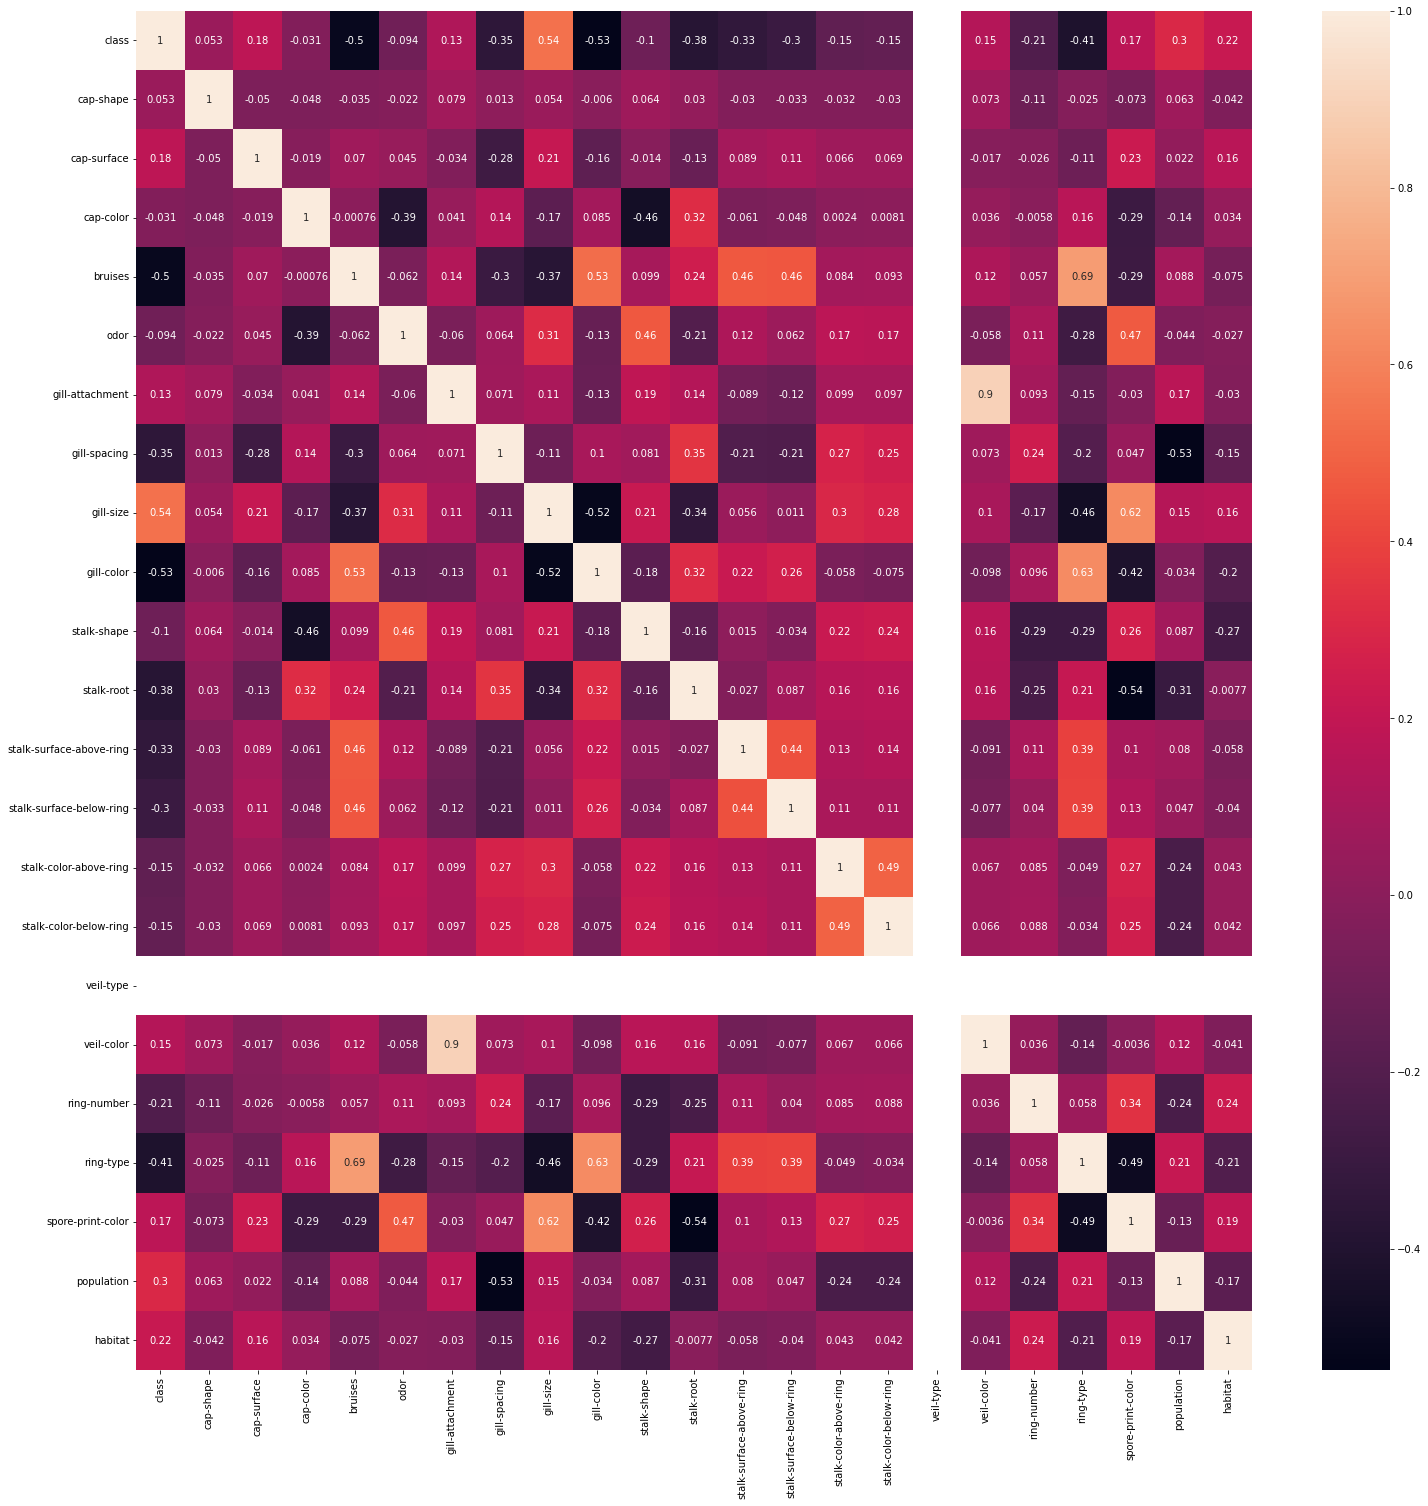

In [11]:
# Checking correlation

plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

In [12]:
# Splitting the Data for train and test.

from sklearn.model_selection import train_test_split
y= data['class']
x= data.drop(['class'], axis=1)

In [13]:
#Standardizing the variables.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [14]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= 30,test_size= 0.2)

In [16]:
#Machine Learning Algorithm

# Applying Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score
Classifier= GaussianNB()
Classifier.fit(x_train, y_train)
y_pred= Classifier.predict(x_test)
y_train_pred= Classifier.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print('Accuracy Score is:', accuracy_score(y_test, y_pred))
print('Recall Score is:', recall_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 score is:', f1_score(y_test, y_pred))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred))

Training Accuracy is :  0.9142945068472073
Accuracy Score is: 0.9027692307692308
Recall Score is: 0.9195710455764075
Precision Score: 0.875
F1 score is: 0.8967320261437908

 The confusion matrix is : 
 [[781  98]
 [ 60 686]]


In [17]:
 # Applying Bernoulli Naive Bayes Classifier
    
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(x_train, y_train)
y_pred1= classifier.predict(x_test)
y_train_pred1= classifier.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print('Accuracy Score is:', accuracy_score(y_test, y_pred1))
print('Recall Score is:', recall_score(y_test, y_pred1))
print('Precision Score:', precision_score(y_test, y_pred1))
print('F1 score is:', f1_score(y_test, y_pred1))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred1))

Training Accuracy is :  0.8270503154331436
Accuracy Score is: 0.8326153846153846
Recall Score is: 0.7265415549597856
Precision Score: 0.8885245901639345
F1 score is: 0.799410029498525

 The confusion matrix is : 
 [[811  68]
 [204 542]]


In [18]:
# Applying Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2= dt.predict(x_test)

y_train_pred2 = dt.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2))
print('Accuracy Score is:', accuracy_score(y_test, y_pred2))
print('Recall Score is:', recall_score(y_test, y_pred2))
print('Precision Score:', precision_score(y_test, y_pred2))
print('F1 score is:', f1_score(y_test, y_pred2))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred2))

Training Accuracy is :  1.0
Accuracy Score is: 1.0
Recall Score is: 1.0
Precision Score: 1.0
F1 score is: 1.0

 The confusion matrix is : 
 [[879   0]
 [  0 746]]


In [19]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred3= rf_model.predict(x_test)

y_train_pred3= rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print('Accuracy Score is:', accuracy_score(y_test, y_pred3))
print('Recall Score is:', recall_score(y_test, y_pred3))
print('Precision Score:', precision_score(y_test, y_pred3))
print('F1 score is:', f1_score(y_test, y_pred3))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred3))

Training Accuracy is :  1.0
Accuracy Score is: 1.0
Recall Score is: 1.0
Precision Score: 1.0
F1 score is: 1.0

 The confusion matrix is : 
 [[879   0]
 [  0 746]]


In [20]:
# Applying SVM Model
from sklearn import svm
from sklearn.svm import SVC

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
y_pred4 = svm_linear.predict(x_test)

y_train_pred4 = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print('Accuracy Score is:', accuracy_score(y_test, y_pred4))
print('Recall Score is:', recall_score(y_test, y_pred4))
print('Precision Score:', precision_score(y_test, y_pred4))
print('F1 score is:', f1_score(y_test, y_pred4))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred4))

Training Accuracy is :  0.9769195260809356
Accuracy Score is: 0.9753846153846154
Recall Score is: 0.9731903485254692
Precision Score: 0.9731903485254692
F1 score is: 0.9731903485254692

 The confusion matrix is : 
 [[859  20]
 [ 20 726]]


In [21]:
# Applying KNN model

from sklearn.neighbors import KNeighborsClassifier
classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
y_pred5 = classifer.predict(x_test)

y_train_pred5 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred5))
print('Accuracy Score is:', accuracy_score(y_test, y_pred5))
print('Recall Score is:', recall_score(y_test, y_pred5))
print('Precision Score:', precision_score(y_test, y_pred5))
print('F1 score is:', f1_score(y_test, y_pred5))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred5))

Training Accuracy is :  0.9993845206954917
Accuracy Score is: 0.9981538461538462
Recall Score is: 0.9959785522788204
Precision Score: 1.0
F1 score is: 0.9979852249832102

 The confusion matrix is : 
 [[879   0]
 [  3 743]]


In [22]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
y_pred6 = log_model.predict(x_test)

y_train_pred6= log_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred6))
print('Accuracy Score is:', accuracy_score(y_test, y_pred5))
print('Recall Score is:', recall_score(y_test, y_pred6))
print('Precision Score:', precision_score(y_test, y_pred6))
print('F1 score is:', f1_score(y_test, y_pred6))
print("\n The confusion matrix is : \n", confusion_matrix(y_test, y_pred6))

Training Accuracy is :  0.9496845668564394
Accuracy Score is: 0.9981538461538462
Recall Score is: 0.9463806970509383
Precision Score: 0.9553450608930988
F1 score is: 0.9508417508417508

 The confusion matrix is : 
 [[846  33]
 [ 40 706]]


In [23]:
print('Accuracy Score of Guassian NB:', accuracy_score(y_test, y_pred))
print('Accuracy Score of Bernoulli NB:', accuracy_score(y_test, y_pred1))
print('Accuracy Score of Decision tree classifier:', accuracy_score(y_test, y_pred2))
print('Accuracy Score of Random forest classifier:', accuracy_score(y_test, y_pred3))
print('Accuracy Score of SVM model:', accuracy_score(y_test, y_pred4))
print('Accuracy Score of KNN model:', accuracy_score(y_test, y_pred5))
print('Accuracy Score of Logistic regression:', accuracy_score(y_test, y_pred5))

Accuracy Score of Guassian NB: 0.9027692307692308
Accuracy Score of Bernoulli NB: 0.8326153846153846
Accuracy Score of Decision tree classifier: 1.0
Accuracy Score of Random forest classifier: 1.0
Accuracy Score of SVM model: 0.9753846153846154
Accuracy Score of KNN model: 0.9981538461538462
Accuracy Score of Logistic regression: 0.9981538461538462


All models gives overall good score, but decision tree and random forest model is best among all these models.

----------------